In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [30]:
df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [32]:
df.isna().sum().sum()

np.int64(0)

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

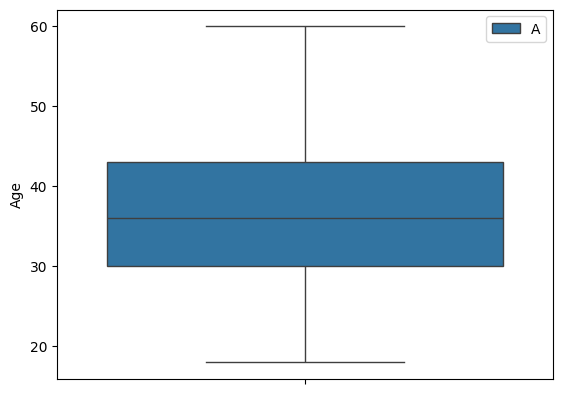

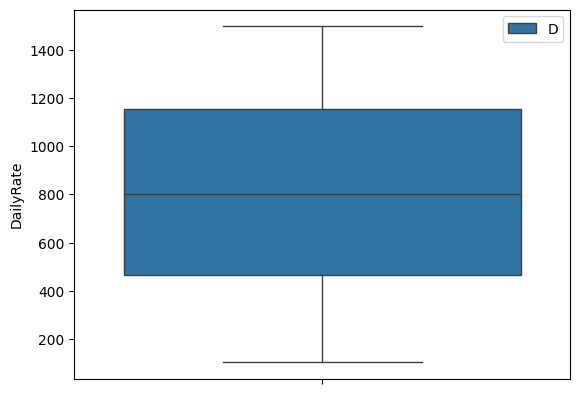

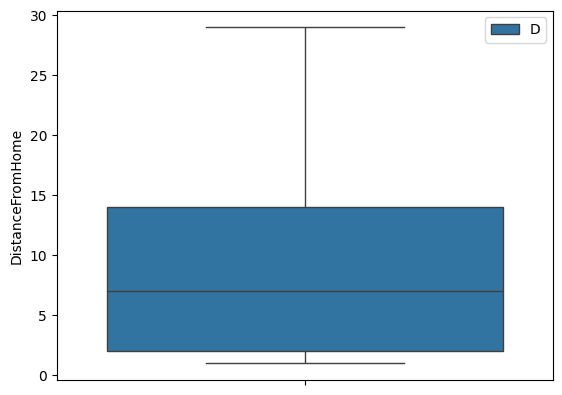

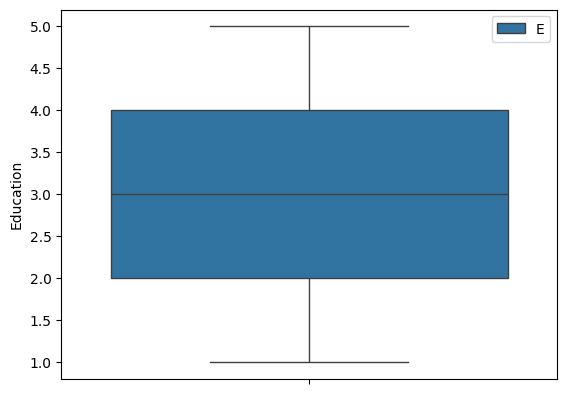

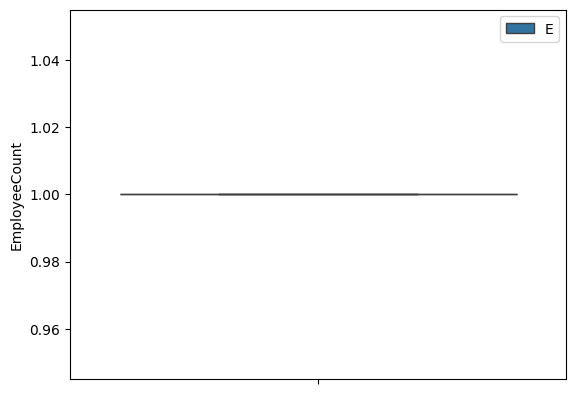

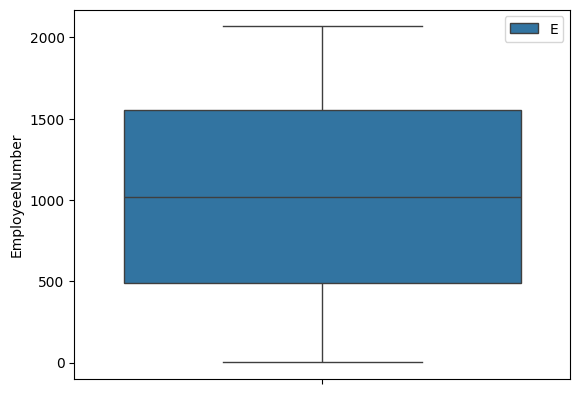

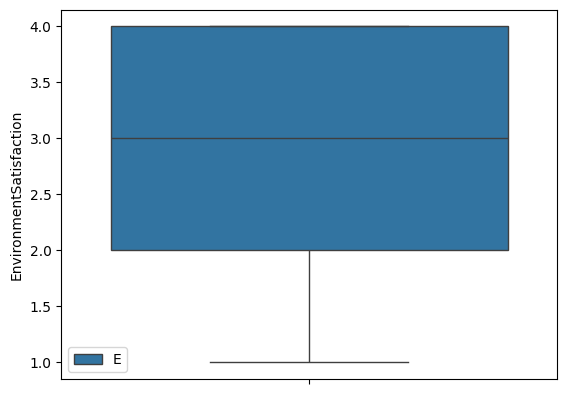

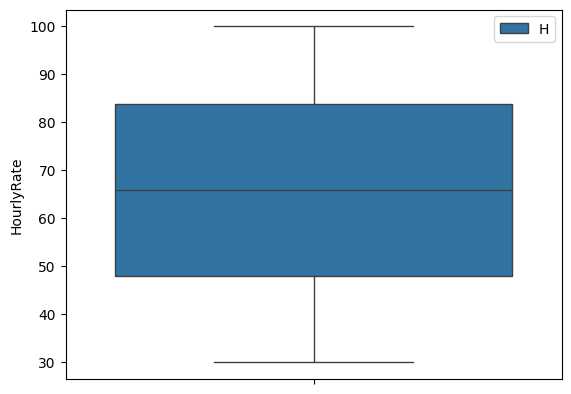

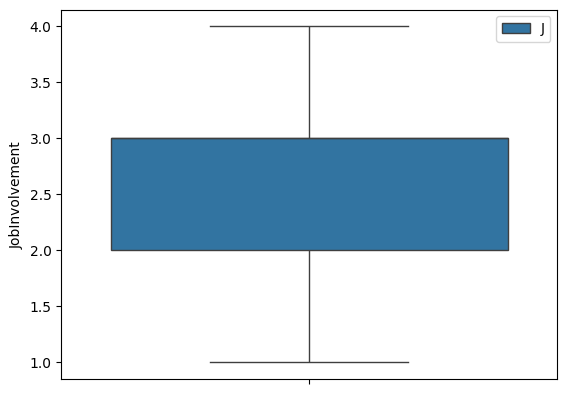

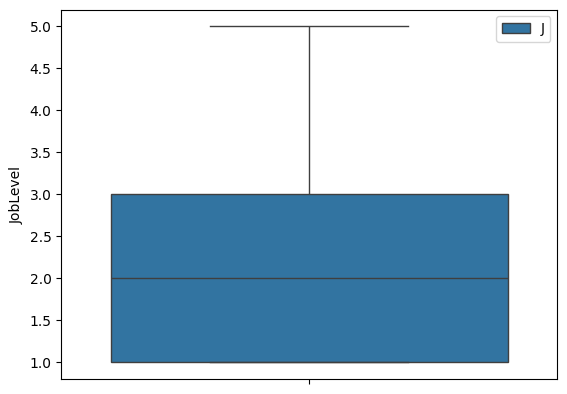

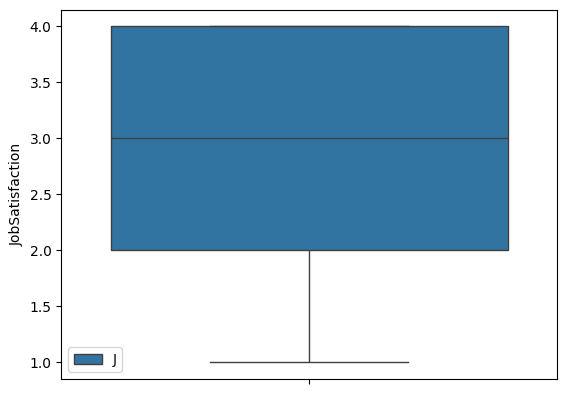

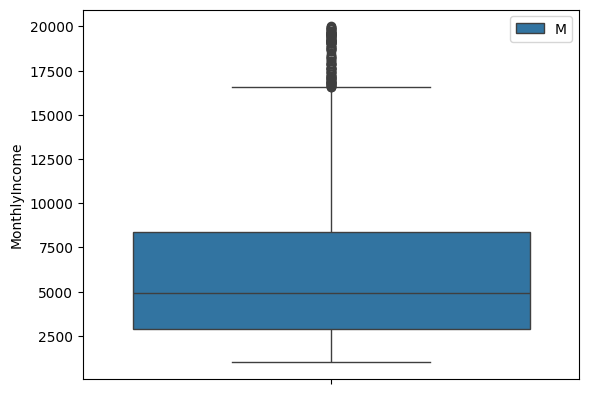

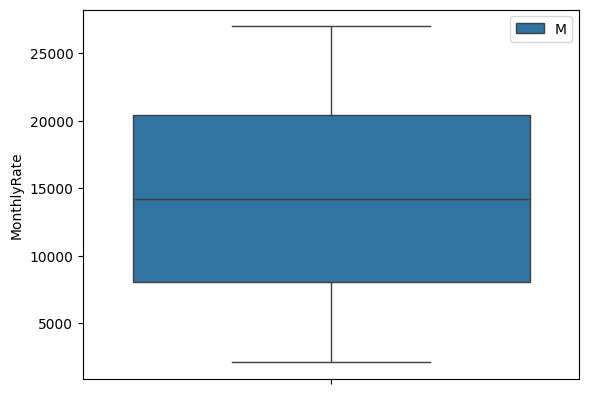

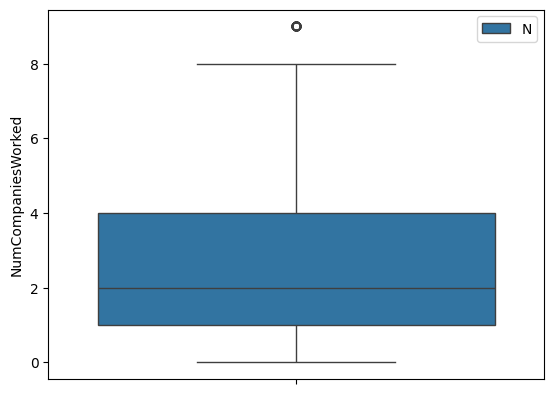

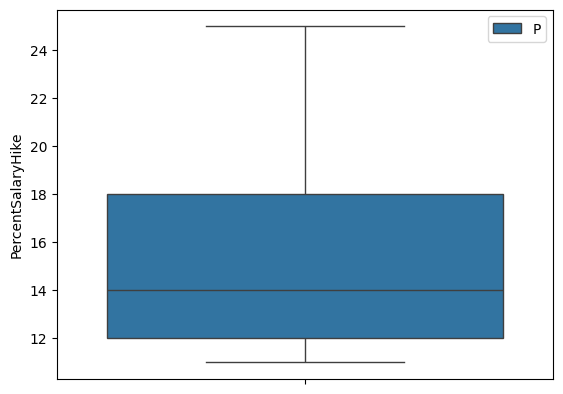

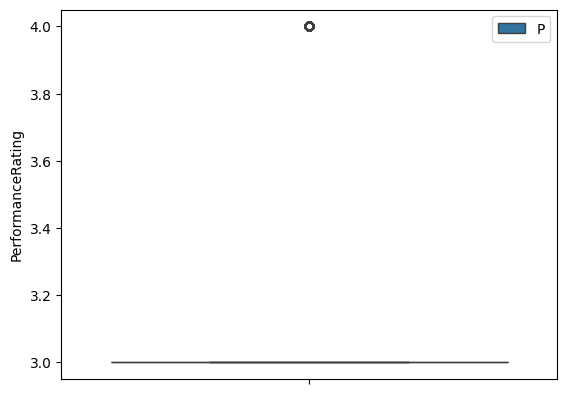

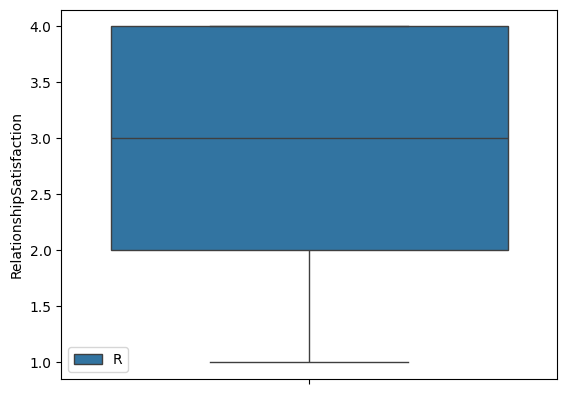

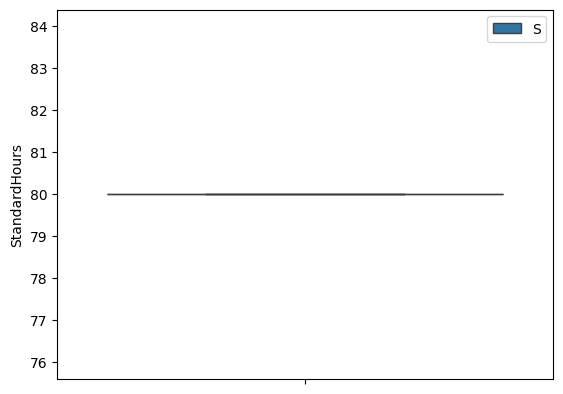

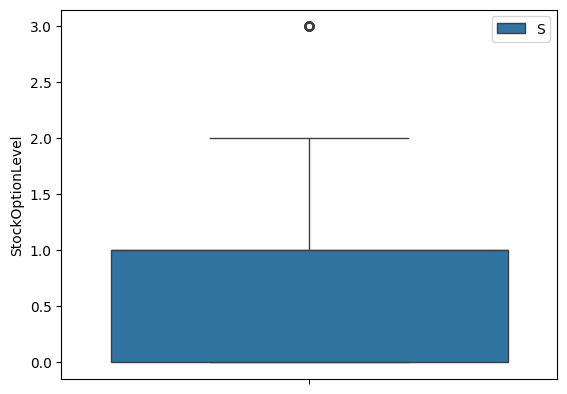

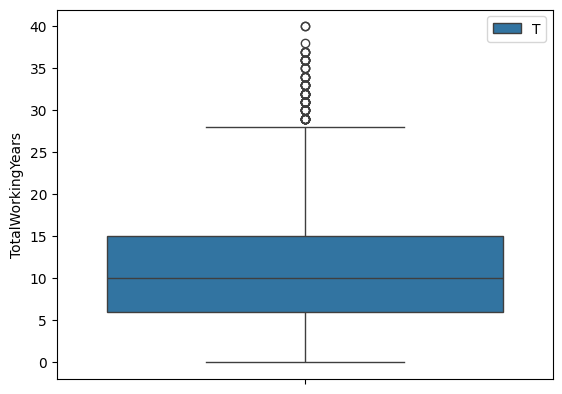

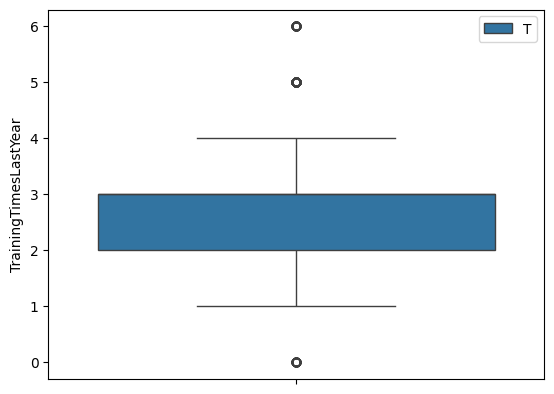

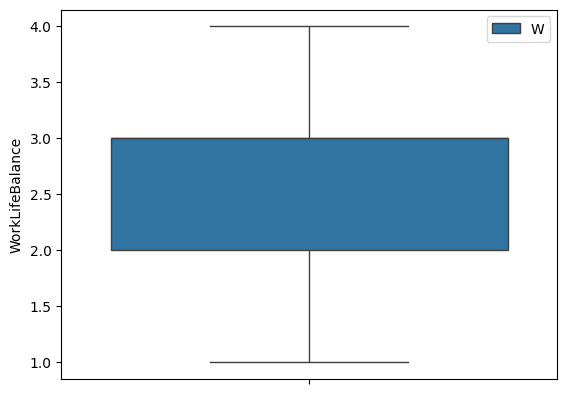

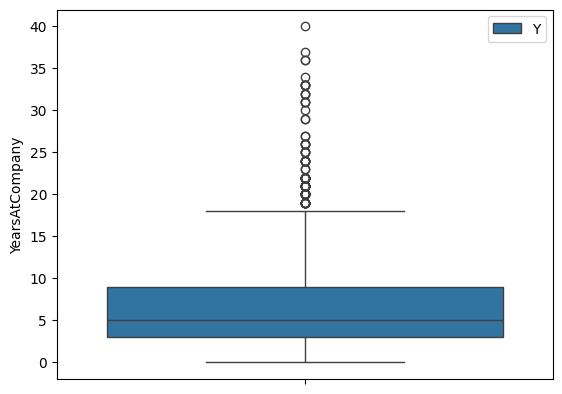

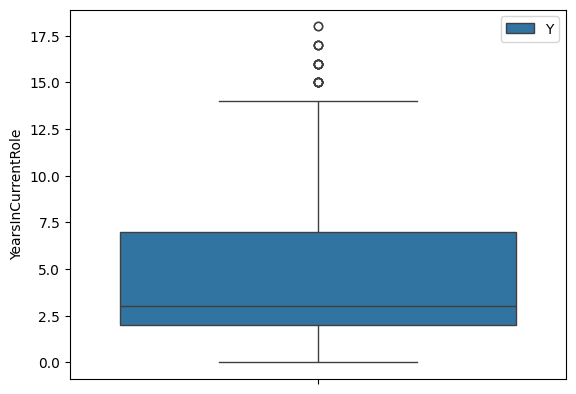

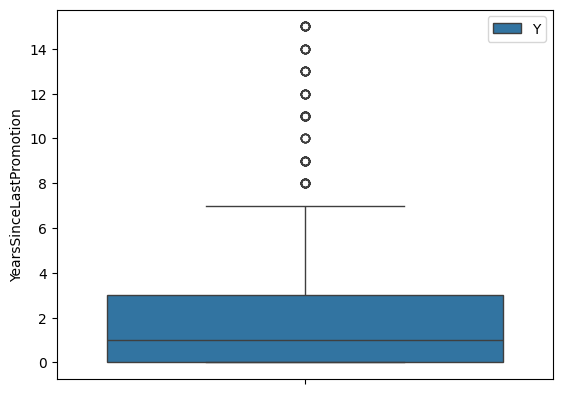

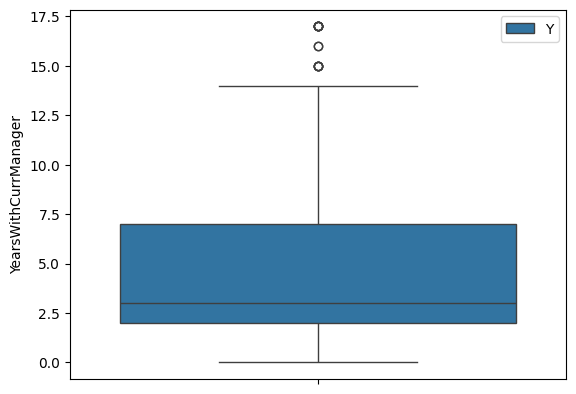

In [35]:
for col in df.columns:
  if df[col].dtype != 'object':
    sns.boxplot(df[col])
    plt.legend(col)
    plt.show()

In [36]:
out_col = ['MonthlyIncome','NumCompaniesWorked','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

In [37]:
for col in out_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  iqr = Q3-Q1
  lower = Q1-1.5*iqr
  upper = Q3+1.5*iqr
  df = df[(df[col]>=lower) & (df[col]<=upper)]

In [38]:
df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [39]:
df['SalaryBand'] = pd.qcut(df['MonthlyIncome'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


In [50]:
df['SalaryBand']=df['SalaryBand'].astype('object')

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [52]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

In [54]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryBand
1,49,0,1,279,1,8,1,1,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,1,2,1373,1,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,0,1,1392,1,3,4,1,1,5,...,80,0,8,3,3,8,7,3,0,2
5,32,0,1,1005,1,2,2,1,1,8,...,80,0,8,2,2,7,7,3,6,2
7,30,0,2,1358,1,24,1,1,1,11,...,80,1,1,2,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,0,0,325,1,5,3,3,1,2057,...,80,0,10,2,3,9,4,1,7,3
1464,26,0,2,1167,2,5,3,4,1,2060,...,80,0,5,2,3,4,2,0,0,2
1465,36,0,1,884,1,23,2,3,1,2061,...,80,1,17,3,3,5,2,0,3,1
1468,49,0,1,1023,2,2,3,3,1,2065,...,80,0,17,3,2,9,6,0,8,0


# Department wise attrition

<Axes: xlabel='Department'>

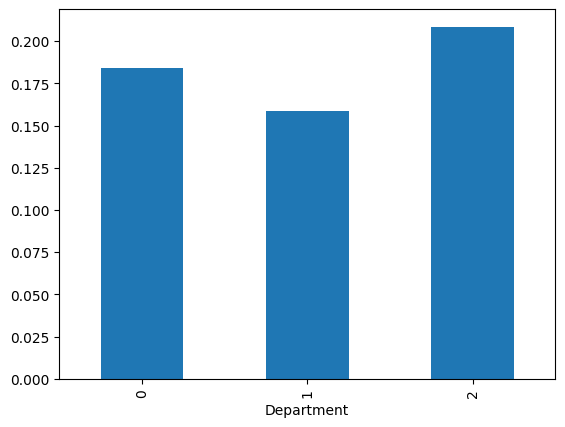

In [62]:
df.groupby('Department')['Attrition'].mean().plot(kind='bar')

# Attrition by salary band

<Axes: xlabel='SalaryBand'>

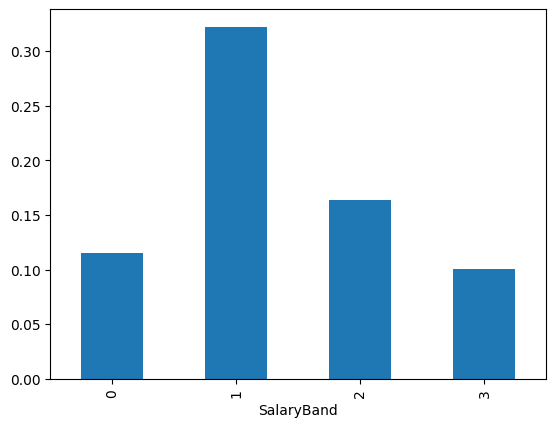

In [61]:
df.groupby('SalaryBand')['Attrition'].mean().plot(kind='bar')

# Promotion vs Attrition

<Axes: xlabel='YearsSinceLastPromotion'>

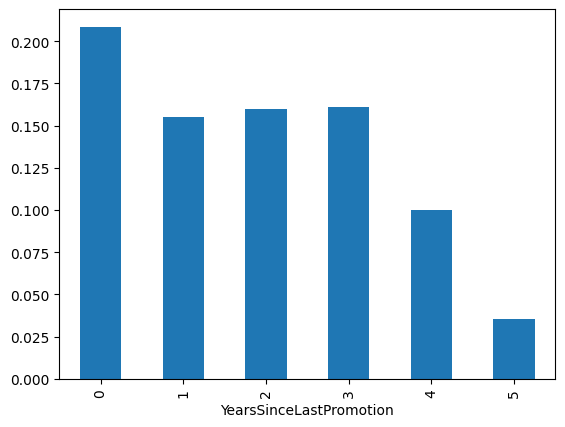

In [64]:
df.groupby('YearsSinceLastPromotion')['Attrition'].mean().plot(kind='bar')

In [68]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif_data=pd.DataFrame()  # creating a structure to compare the muticolinearity of each column
vif_data["feature"]=x.columns   # creating a columns that will hold each colums name of X
vif_data["Multicolinearity_values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data.sort_values(by = 'Multicolinearity_values',ascending = False)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,Multicolinearity_values
26,TotalWorkingYears,2.557308
29,YearsInCurrentRole,2.528618
21,PercentSalaryHike,2.519885
22,PerformanceRating,2.513224
3,Department,2.394617
31,YearsWithCurrManager,2.280268
14,JobRole,2.237692
25,StockOptionLevel,2.131918
16,MaritalStatus,2.107059
13,JobLevel,1.974125


In [72]:
x.drop('YearsAtCompany',axis = 1, inplace= True)

In [74]:
x.drop('MonthlyIncome',axis = 1, inplace= True)

In [76]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryBand
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,7,1,7,0
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,1
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,7,3,0,2
5,32,1,1005,1,2,2,1,1,8,4,...,3,80,0,8,2,2,7,3,6,2
7,30,2,1358,1,24,1,1,1,11,4,...,2,80,1,1,2,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,0,325,1,5,3,3,1,2057,2,...,2,80,0,10,2,3,4,1,7,3
1464,26,2,1167,2,5,3,4,1,2060,4,...,4,80,0,5,2,3,2,0,0,2
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,2,0,3,1
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,6,0,8,0


In [77]:
y

,Attrition
1,0
2,1
3,0
5,0
7,0
...,...
1463,0
1464,0
1465,0
1468,0


# Model Building


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [90]:
from sklearn.metrics import *

In [91]:
accuracy_score = accuracy_score(y_test,y_predict)
accuracy_score

0.8502994011976048

In [92]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[136,   0],
       [ 25,   6]])

<Axes: >

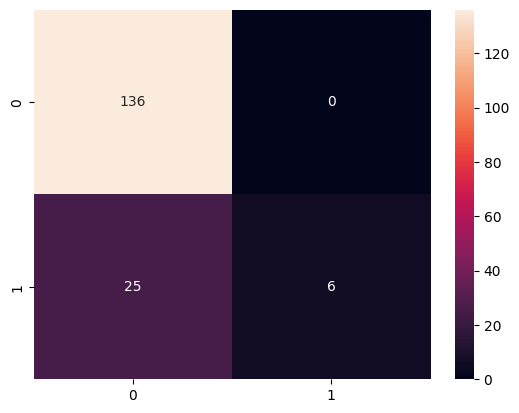

In [94]:
sns.heatmap(cm,annot=True, fmt='g')